# Emotion Detection in Twitter Data using NLP Techniques
---
---
You have been given with a dataset of Twitter posts (tweets) that are labelled with specific emotions.
- Your objective is to develop a model that can accurately classify these tweets into different emotion categories such as :
  - joy,
  - sadness,
  - anger,
  - fear,
  - surprise etc.

To achieve this, follow the steps outlined below:
- Data Preprocessing
- FeatureExtraction
- ModelBuilding and Evaluation (Create different models, including deep learning models)
- Evaluate the Model's Performance

---
    
- Data Preprocessing

  ● Cleaning the dataset, handling missing values, and preparing the data for analysis.

- Feature Extraction

  ● Use techniques used for transforming the raw text data into numerical features that can be used by machine learning models.

- Model Building and Evaluation

  ● Detail the construction and training of various models, including traditional machine learning models and deep learning models.

● Include the code and explanation for each model.

- Evaluate the Model's Performance

- Present the results and compare the performance of different models.

#1. Data Preprocessing
---

In [ ]:
# Import libraries
#------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
#---------------------
df = pd.read_csv('/content/tweet_emotions.csv')

In [ ]:
# Display the first few rows
#--------------------
print(df.head())

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [ ]:
# Check for missing values
#-------------------------------------------
print(df.isnull().sum())

tweet_id     0
sentiment    0
content      0
dtype: int64


###No missing values found

In [ ]:
#Statistical analysis of the dataset
#-------------------------------------
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [ ]:
#Complete information of the dataset
#-------------------------------------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


###There are 2 categorical columns ['sentiment','content'] and 1 numerical column in the dataset ['tweet_id']

In [ ]:
#Shape of the dataset
print(df.shape)
#Dimension of the dataset
print(df.ndim)
print(df.size)

(40000, 3)
2
120000


In [ ]:
#Drop duplicates
#-----------------
df.drop_duplicates(subset=['content'], inplace=True)

In [ ]:
#Remove rows where text or label is missing
#-----------------------------------------------
df.dropna(subset=['content','tweet_id','sentiment'],inplace=True)

In [ ]:
#shape of datset after removing duplicates
#-------------------------------------------
print(df.shape)

(39827, 3)


In [ ]:
#Simple text pre-processing
#--------------------------------
import re #import regular expression library

def cleaned_text(text):
  text = re.sub(r'[^a-zA-Z\s]','',text) # remove special characters and numbers
  text = text.lower() # convert to lower case
  text = re.sub(r'\s+','',text).strip()#remove whitespaces
  return text

In [ ]:
df['cleaned_content'] = df['content'].apply(cleaned_text)
print("\n Cleaned text")
print("*"*(len('cleaned_content')))
print(df[['content','cleaned_content','sentiment']].head())


 Cleaned text
***************
                                             content  \
0  @tiffanylue i know  i was listenin to bad habi...   
1  Layin n bed with a headache  ughhhh...waitin o...   
2                Funeral ceremony...gloomy friday...   
3               wants to hang out with friends SOON!   
4  @dannycastillo We want to trade with someone w...   

                                     cleaned_content   sentiment  
0  tiffanylueiknowiwaslistenintobadhabitearlieran...       empty  
1       layinnbedwithaheadacheughhhhwaitinonyourcall     sadness  
2                        funeralceremonygloomyfriday     sadness  
3                      wantstohangoutwithfriendssoon  enthusiasm  
4  dannycastillowewanttotradewithsomeonewhohashou...     neutral  


In [ ]:
#Rows after preprocessing
#------------------------------
print("Rows after preprocessing:", len(df))
print(df.head())

Rows after preprocessing: 39827
     tweet_id   sentiment                                            content  \
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...   
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  @dannycastillo We want to trade with someone w...   

                                     cleaned_content  
0  tiffanylueiknowiwaslistenintobadhabitearlieran...  
1       layinnbedwithaheadacheughhhhwaitinonyourcall  
2                        funeralceremonygloomyfriday  
3                      wantstohangoutwithfriendssoon  
4  dannycastillowewanttotradewithsomeonewhohashou...  


#2. Feature Extraction
---
Transforming the raw text data into numerical features that can be used by machine learning models-using TF-IDF

In [ ]:
#Import libraries
#----------------------
from sklearn.feature_extraction.text import TfidfVectorizer
X_text = df['cleaned_content']
y = df['sentiment']

In [ ]:
#Using TF-IDF
#--------------
tfidf_vector = TfidfVectorizer(max_features=5000,ngram_range=(1,2),stop_words='english')
X_tfidf = tfidf_vector.fit_transform(X_text)

In [ ]:
#Fit and transform
#-------------------
X_tfidf = tfidf_vector.fit_transform(X_text)
print("After vectorization:",X_tfidf.shape)

After vectorization: (39827, 5000)


#3. Model Building and Evaluation
---

In [ ]:
#Splitting the data into 70% traing data/15% validation data and 15% testing data
#-----------------------
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
X_train,X_temp,y_train,y_temp = train_test_split(X_tfidf,y,test_size=0.3,stratify=y,random_state=42)
X_valid,X_test,y_valid,y_test = train_test_split(X_temp,y_temp,test_size=0.5,stratify= y_temp,random_state=42)

print(f"Train data shape: {X_train.shape}")
print(f"Validation data shape: {X_valid.shape}")
print(f"Test data shape: {X_test.shape}")

Train data shape: (27878, 5000)
Validation data shape: (5974, 5000)
Test data shape: (5975, 5000)


In [ ]:
#Fit on training data
#Performance Evaluation on validation data using Accuracy, Macro-F1, and a classification report
#----------------------------------------------------------------------------
def evaluate_model(model,Xtr,ytr,Xva,yva,title=''):
  #Fit the model on (Xtr,ytr) and evaluate on(Xva,yva)
  model.fit(Xtr,ytr)
  y_predicted = model.predict(Xva)

  accuracy = accuracy_score(yva,y_predicted)
  f1_macro = f1_score(yva,y_predicted,average='macro')
  print(f"\n---Validation results for {title}---")

  print(f"Accuracy:{accuracy}")
  print(f"Macro-F1:{f1_macro}")
  print(classification_report(yva,y_predicted))
  print(confusion_matrix(yva,y_predicted))

  return accuracy,f1_macro,y_predicted

In [ ]:
#Refit on training datamand evaluating on testing data using accuracy,macro,classification report
#----------------------------------------------------------
def final_evaluation(model,Xtr,ytr,Xte,yte,title=''):
  model.fit(Xtr,ytr)
  y_predicted = model.predict(Xte)

  accuracy = accuracy_score(yte,y_predicted)
  f1_macro = f1_score(yte,y_predicted,average='macro')

  print(f"\n=======Final Test Results for {title}=========")
  print(f"Accuracy:{accuracy}")
  print(f"Macro-F1:{f1_macro}")
  print(classification_report(yte,y_predicted))
  print(confusion_matrix(yte,y_predicted))

  fig,ax = plt.subplots()
  ConfusionMatrixDisplay.from_predictions(yte,y_predicted,ax=ax)
  ax.set_title(f"Confusion matrix-{title}")
  plt.tight_layout()
  plt.show()

  return accuracy,f1_macro,y_predicted



##3.1 Traditional Model-SVC (Support Vector Classifier)


---Validation results for LinearSVC---
Accuracy:0.213759625041848
Macro-F1:0.030018726798724357
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        17
     boredom       0.00      0.00      0.00        27
       empty       0.00      0.00      0.00       124
  enthusiasm       0.00      0.00      0.00       114
         fun       0.00      0.00      0.00       266
   happiness       0.56      0.01      0.01       777
        hate       0.00      0.00      0.00       198
        love       0.56      0.01      0.02       568
     neutral       0.33      0.00      0.00      1290
      relief       0.00      0.00      0.00       228
     sadness       1.00      0.00      0.01       773
    surprise       0.00      0.00      0.00       327
       worry       0.21      1.00      0.35      1265

    accuracy                           0.21      5974
   macro avg       0.20      0.08      0.03      5974
weighted avg       0.37      0.21    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=======Final Test Results for LinearSVC=========
Accuracy:0.21405857740585774
Macro-F1:0.030503889153953842
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        16
     boredom       0.00      0.00      0.00        27
       empty       0.00      0.00      0.00       123
  enthusiasm       0.00      0.00      0.00       113
         fun       0.00      0.00      0.00       266
   happiness       0.57      0.01      0.01       778
        hate       0.00      0.00      0.00       199
        love       0.57      0.01      0.03       568
     neutral       0.67      0.00      0.01      1290
      relief       0.00      0.00      0.00       229
     sadness       0.33      0.00      0.00       773
    surprise       0.00      0.00      0.00       327
       worry       0.21      1.00      0.35      1266

    accuracy                           0.21      5975
   macro avg       0.18      0.08      0.03      5975
weighted avg       0.36  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


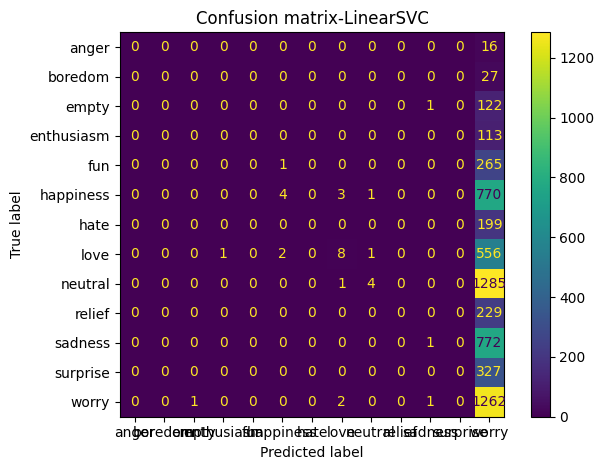

(0.21405857740585774,
 0.030503889153953842,
 array(['worry', 'worry', 'worry', ..., 'worry', 'worry', 'worry'],
       dtype=object))

In [ ]:
from sklearn.svm import LinearSVC #import libraries

svc_model = LinearSVC(class_weight="balanced")
#Evaluation
svc_val_acc, svc_val_f1, _ = evaluate_model(svc_model, X_train, y_train, X_valid, y_valid, "LinearSVC")

#Final test evaluation
final_evaluation(svc_model, X_train, y_train, X_test, y_test, "LinearSVC")

---
###RESULT EVALUATION WITH SVC:
---
1. Validation acuuracy = 21%
2. Macro-F1 = 0.03
3. Confusion matrix shows all "worry"


##3.2 Using Naive_Bayes


---Validation results for MultinomialNB---
Accuracy:0.21794442584532978
Macro-F1:0.04129340663774416
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        17
     boredom       0.00      0.00      0.00        27
       empty       0.00      0.00      0.00       124
  enthusiasm       0.00      0.00      0.00       114
         fun       0.00      0.00      0.00       266
   happiness       0.50      0.01      0.01       777
        hate       0.00      0.00      0.00       198
        love       0.80      0.01      0.01       568
     neutral       0.22      0.88      0.35      1290
      relief       0.00      0.00      0.00       228
     sadness       0.50      0.00      0.01       773
    surprise       0.00      0.00      0.00       327
       worry       0.22      0.13      0.16      1265

    accuracy                           0.22      5974
   macro avg       0.17      0.08      0.04      5974
weighted avg       0.30      0.2

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

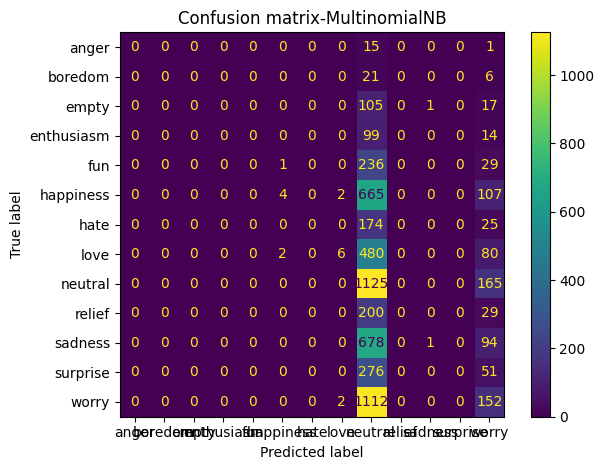

(0.21556485355648536,
 0.04079092616639894,
 array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
        'neutral'], dtype='<U10'))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Definig model
#--------------------
nb_model = MultinomialNB()
#Validation evaluation
#-----------------------
nb_val_acc, nb_val_f1, _ = evaluate_model(nb_model,X_train,y_train,X_valid,y_valid,"MultinomialNB")

#Final test evaluation
#------------------------
final_evaluation(nb_model,X_train,y_train,X_test,y_test,"MultinomialNB")
#

---
###RESULT FOR NAIVE-BAYES:
---
1. Accuracy =21%
2. Macro-F1 = 0.041
3. Mostly "neutral" predictions

#4. Deep Learning based Model

##4.a.Using BERT with Hugging face transformers

In [ ]:
!pip install transformers datasets evaluate accelerate -q


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset,DatasetDict

In [ ]:
#Encoding labels
#-------------------
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_valid_enc = label_encoder.transform(y_valid)
y_test_enc = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

# Convert sparse matrices to dense NumPy arrays for Dataset.from_dict
X_train_dense = X_train.toarray()
X_valid_dense = X_valid.toarray()
X_test_dense = X_test.toarray()


#HuggingFace DatasetDict
training_ds = Dataset.from_dict({"text": X_train_dense, "label": y_train_enc})
validation_ds = Dataset.from_dict({"text": X_valid_dense, "label": y_valid_enc})
testing_ds = Dataset.from_dict({"text": X_test_dense, "label": y_test_enc})
dataset = DatasetDict({"train": training_ds, "validation": validation_ds, "test": testing_ds})